### Setup

In [43]:
%reload_ext autoreload
%autoreload 2

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

### Load data

In [45]:
systematic_review_data = pd.read_excel("data/Systematic_review.xlsx")[['Author', 'Document title', 'Abstract', 'Year', 'Original scale name', 'Category', 'Item content']]
systematic_review_data.head()


,Author,Document title,Abstract,Year,Original scale name,Category,Item content
0,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990,FEM scale,feminism,women have the right to compete with men in ev...
1,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990,perceived level of commitment to the women's m...,feminism,i would be willing to participate in local com...
2,"Lee, Dong Yul;Gee, Angela;Uhlemann, Max R.",Perception of clients' presenting concern as a...,The present study asked the following question...,2000,attitudes toward feminism and the women's move...,feminism,the leaders of the women’s movement may be ext...
3,"Murphy, L., Rollins, J.H.",Attitudes toward women in co-ed and all female...,NaN,1980,attitudes toward woman scale (AWS),feminism,swearing and obscenity are more repulsive in t...
4,"Nadeem, F., Khalid, R.",The relationship of gender role attitudes with...,NaN,2018,attitudes toward woman scale (AWS),feminism,swearing and obscenity in the speech of a man ...


In [46]:
items_df = systematic_review_data.dropna(subset='Item content')[['Author', 'Document title', 'Abstract', 'Year', 'Original scale name', 'Category', 'Item content']]

items_df["Item content"] = items_df["Item content"].apply(lambda x: [i.strip() for i in str(x).split("//")])
items_df =  items_df.explode('Item content')

items_df.sample(10)

,Author,Document title,Abstract,Year,Original scale name,Category,Item content
622,"Elmore, Patricia B.;Vasu, Ellen S.",A model of statistics achievement using spatia...,Examined the importance of spatial ability (Ki...,1986,,feminism,society has a responsibility toward all childr...
700,"Halas, Celia M.",Sex-role stereotypes: Perceived childhood soci...,Administered the Attitude Toward Women Scale (...,1974,attitudes toward woman scale (AWS),feminism,sons in a family should be given even more enc...
319,"Parelius, Ann P.","Emerging sex-role attitudes, expectations, and...",Used questionnaire data to assess the attitude...,1975,feminist orientation toward sex-role behavior,feminism,marital and maternal role supremacy does not t...
875,"Erchull, Mindy J.;Liss, Miriam",Feminists who flaunt it: Exploring the enjoyme...,The phenomenon of women enjoying sexualized ma...,2013,feminist perspectives scale (FPS),feminism,prostitution grows out of the male culture of ...
1170,"Poll, Alex;Critchley, Christine",Development and validation of the feminist soc...,Feminist identity is a multidimensional constr...,2022,NaN,feminism,it is a man's duty to maintain order in his fa...
1098,"Yoder, Janice D.;Fischer, Ann R.;Kahn, Arnold ...",Changes in students' explanations for gender d...,We explored how students' endorsements of esse...,2007,NaN,feminism,"if i were to paint a picture or write a poem, ..."
659,"Platt, Lisa F.;Szoka, Spring L.","Endorsement of feminist beliefs, openness, and...",The inclusion of transgender and gender noncon...,2021,liberal feminist attitude and ideology scale (...,feminism,doctors need to take women's health concerns m...
981,"Swim, J.K., Cohen, L.L.","Overt, covert, and subtle sexism: A comparison...",NaN,1997,attitudes toward woman scale (AWS),feminism,women should be concerned with their duties of...
268,"Lee, Jaeeun;Wessel, Jennifer L.",Is feminist identity beneficial for womenâ€™s ...,"Using latent profile analysis, we examined whe...",2022,liberal feminist attitude and ideology scale (...,feminism,a woman should not have to get permission from...
3138,"Chan, Hoi-Wing;Tam, Kim-Pong",Do people's assumptions about the social world...,Why do people respond to environmental issues ...,2021,perceived collective self-efficacy,environmentalism,i am confident that together we americans can ...


### Tokenization

In [47]:
from modules.utils import preprocess_keep_or_exclude_pos


items_df['tokens'] = items_df['Item content'].apply(lambda s: preprocess_keep_or_exclude_pos(s))

items_df['tokens_nouns'] = items_df['Item content'].apply(lambda s: preprocess_keep_or_exclude_pos(
    s,
    keep_pos={"NOUN","PROPN", "ADJ"}
))

items_df['tokens_nouns__unique'] = items_df['tokens_nouns'].apply(lambda s: ' '.join(list(set(s))))


In [48]:
items_df.sample(10)

,Author,Document title,Abstract,Year,Original scale name,Category,Item content,tokens,tokens_nouns,tokens_nouns__unique
603,"Szymanski, Dawn M.",Feminist Identity and Theories as Correlates o...,Although feminist supervision approaches have ...,2005,NaN,feminism,prostitution grows out of the male culture of ...,"[prostitution, grow, male, culture, violence, ...","[prostitution, male, culture, violence, male, ...",male value social prostitution culture control...
237,"Moradi, Bonnie;Martin, Annelise;Brewster, Mela...",Disarming the threat to feminist identificatio...,Many individuals endorse feminist values but d...,2012,feminist threat index,feminism,conservative / liberal,"[conservative, liberal]","[conservative, liberal]",conservative liberal
1399,"Carraro, Luciana;Castelli, Luigi;Macchiella, C...",The automatic conservative: Ideology-based att...,Research has widely explored the differences b...,2011,operational ideology,ideology,homosexual marriage,"[homosexual, marriage]","[homosexual, marriage]",marriage homosexual
3322,"Parker, J.D., McDonough, M.H.",Environmentalism of African Americans: An anal...,NaN,1999,environmental structure scale,environmentalism,people like me can have a great amount of infl...,"[people, great, amount, influence, result, eff...","[people, great, amount, influence, result, eff...",people influence amount environmental result c...
3351,"Taskin, O.",The environmental attitudes of Turkish senior ...,Very little is known about the reasoning under...,2009,NaN,environmentalism,collecting more taxes from families with more ...,"[collect, taxis, family, child]","[taxis, family, child]",child taxis family
237,"Moradi, Bonnie;Martin, Annelise;Brewster, Mela...",Disarming the threat to feminist identificatio...,Many individuals endorse feminist values but d...,2012,feminist threat index,feminism,educated / uneducated,"[educate, uneducated]",[uneducated],uneducated
2978,"Ozdemir, O",THE ENVIRONMENTALISM OF UNIVERSITY STUDENTS: T...,The study tries to determine the environmental...,2012,NaN,environmentalism,the existence of living things not useful to h...,"[existence, live, thing, useful, human, import...","[existence, thing, useful, human, important]",thing useful important human existence
329,"Hoyt, Crystal L.",Gender bias in employment contexts: A closer e...,This research extends the role incongruity ana...,2012,attitudes toward woman scale (AWS),feminism,the husband should not be favored by law over ...,"[husband, favor, law, wife, disposal, family, ...","[husband, law, wife, disposal, family, propert...",husband wife law disposal family property income
2459,"Skitka, Linda J.;Mullen, Elizabeth;Griffin, Th...","Dispositions, scripts, or motivated correction...",Research has consistently found that liberals ...,2002,political orientation,political orientation,How much do you tend to dislike political libe...,"[much, tend, dislike, political, liberal]","[much, political, liberal]",much political liberal
692,"Rowland, Robyn",Australian data on the Attitude Toward Women S...,"The Attitude Toward Women Scale, an American q...",1977,attitudes toward woman scale (AWS),feminism,swearing and obscenity are more repulsive in t...,"[swearing, obscenity, repulsive, speech, woman...","[swearing, obscenity, repulsive, speech, woman...",speech swearing woman repulsive man obscenity


### Deduplication

In [49]:
items_df__ = items_df.copy()

In [50]:
from modules.deduplication import dedupe_and_map_versions

# 1) Dedup by exact Item content
dedup_by_content, map_content = dedupe_and_map_versions(items_df_, subset="Item content")
print(len(items_df_))
print(len(dedup_by_content))

# 2) Dedup by tokens but keep the mapping of all Item-content variants
dedup_by_tokens, map_tokens = dedupe_and_map_versions(items_df_, subset="tokens_nouns__unique")
print(len(dedup_by_tokens))

# Example: see all text variants for one representative row
some_rep_text = dedup_by_tokens.iloc[1]["Item content"]

map_tokens[some_rep_text]  # -> list of original "Item content" versions for that group


4500
4500
4500


/Users/ezequiellopez/_research_projects/__summer/left_items_review/modules/deduplication.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  key_df = df[subset].applymap(_hashable)
/Users/ezequiellopez/_research_projects/__summer/left_items_review/modules/deduplication.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  key_df = df[subset].applymap(_hashable)


[['as head of the household, the father should have final authority over his children']]

In [51]:

items_df = dedup_by_tokens

### Embeddings

For new computation of embeddings, please run in your terminal the following:
```bash
python modules/embeddings.py \
  --input data/Systematic_review.xlsx \
  --output data/items_df.pkl
```
It will run the script outside this notebook and will generate a file with emebeddings to be loaded in the next cells. For this script to run properly, you should have your embedding model running. Please check out the Readme to configure this.

In [73]:
#from modules.embeddings import get_embedding

In [74]:
# items_df['qwen_embeddings'] = items_df['tokens_nouns__unique'].apply(lambda s: get_embedding(s))


In [75]:

# items_df['qwen_embeddings_raw'] = items_df['Item content'].apply(lambda s: get_embedding(s))

In [76]:
# items_df.to_pickle('items_df.pkl')


Loading the existing dataframe with embeddings included

In [70]:

items_df_ = pd.read_pickle('data/items_df.pkl')


In [71]:
items_df = items_df.merge(
    items_df_[['Item content', 'qwen_embeddings', 'qwen_embeddings_raw']],
    on='Item content',
    how='left'
)
items_df.sample(10)

,Author,Document title,Abstract,Year,Original scale name,Category,Item content,tokens,tokens_nouns,tokens_nouns__unique_list,tokens_nouns__unique,qwen_embeddings_x,group,qwen_embeddings_raw_x,Item content__versions,qwen_embeddings_y,qwen_embeddings_raw_y,qwen_embeddings,qwen_embeddings_raw
3655,"Chan, Hoi-Wing;Tam, Kim-Pong",Do people's assumptions about the social world...,Why do people respond to environmental issues ...,2021,NaN,environmentalism,society will continue to solve even the bigges...,"[society, continue, solve, even, big, environm...","[society, big, environmental, problem]","[problem, society, big, environmental]",problem society big environmental,"[0.6290401816368103, 2.3409054279327393, 0.182...",0.0,"[1.495957851409912, 2.067274808883667, 1.20090...",[society will continue to solve even the bigge...,"[0.6290401816368103, 2.3409054279327393, 0.182...","[1.495957851409912, 2.067274808883667, 1.20090...","[0.6290401816368103, 2.3409054279327393, 0.182...","[1.495957851409912, 2.067274808883667, 1.20090..."
3115,"Van Hiel, A.",A psycho-political profile of party activists ...,NaN,2012,"left-wing authoritarianism (Van Hiel et al., 2...",left-wing authoritarianism,even though the conservative establishment who...,"[even, conservative, establishment, control, c...","[conservative, establishment, country, repress...","[unfair, country, nonviolent, conservative, es...",unfair country nonviolent conservative establi...,"[1.3281657695770264, 2.775524854660034, -0.515...",0.0,"[1.2824031114578247, 0.037984076887369156, -0....",[even though the conservative establishment wh...,"[1.3281657695770264, 2.775524854660034, -0.515...","[1.2824031114578247, 0.037984076887369156, -0....","[1.3281657695770264, 2.775524854660034, -0.515...","[1.2824031114578247, 0.037984076887369156, -0...."
1754,"Thumin, Fred J.","The relation of liberalism to sex, age, academ...",Administered a liberalism-conservatism scale t...,1972,operational ideology,ideology,it is old-fashioned and incorrect to think tha...,"[old, fashioned, incorrect, think, communisn, ...","[old, fashioned, incorrect, communisn, threat,...","[communisn, old, world, fashioned, threat, inc...",communisn old world fashioned threat incorrect u,"[-1.6442981958389282, 0.9835405945777893, -2.8...",0.0,"[-2.579174280166626, 3.5817835330963135, -0.35...",[it is old-fashioned and incorrect to think th...,"[-1.6442981958389282, 0.9835405945777893, -2.8...","[-2.579174280166626, 3.5817835330963135, -0.35...","[-1.6442981958389282, 0.9835405945777893, -2.8...","[-2.579174280166626, 3.5817835330963135, -0.35..."
4001,"Arp III, W., Kenny, C.",Black environmentalism in the local community ...,NaN,1996,index of attitudes toward pollution laws and p...,environmentalism,pollution control measures have created unfair...,"[pollution, control, measure, create, unfair, ...","[pollution, control, measure, unfair, burden, ...","[measure, unfair, control, pollution, burden, ...",measure unfair control pollution burden industry,"[-0.7926908135414124, 2.7565765380859375, -1.0...",0.0,"[-1.6955697536468506, 1.5997085571289062, -1.1...",[pollution control measures have created unfai...,"[-0.7926908135414124, 2.7565765380859375, -1.0...","[-1.6955697536468506, 1.5997085571289062, -1.1...","[-0.7926908135414124, 2.7565765380859375, -1.0...","[-1.6955697536468506, 1.5997085571289062, -1.1..."
3620,"van Riper, Carena J.;Kyle, Gerard T.",Understanding the internal processes of behavi...,Theoretical advances in research on the antece...,2014,awareness of consequences,environmentalism,Human impact on the marine environment on CHIS,"[human, impact, marine, environment, chis]","[human, impact, marine, environment, chis]","[chis, environment, human, marine, impact]",chis environment human marine impact,"[-0.5706232190132141, -0.5665351152420044, -2....",0.0,"[2.3462188243865967, -1.085740327835083, 0.397...",[Human impact on the marine environment on CHIS],"[-0.5706232190132141, -0.5665351152420044, -2....","[2.3

### Similarity

In [72]:
from modules.similarity import find_similar_groups


In [73]:
print(items_df['qwen_embeddings_raw'].apply(type).value_counts())

# 1) Convert list‐ or tensor‐like entries into np.ndarray, leave np.ndarray alone:
def _ensure_ndarray(x):
    # if it’s already a NumPy array, keep it
    if isinstance(x, np.ndarray):
        return x
    # if it’s a list or tuple, convert to array
    if isinstance(x, (list, tuple)):
        return np.array(x)
    # if it’s a PyTorch tensor
    try:
        import torch
        if isinstance(x, torch.Tensor):
            return x.cpu().numpy()
    except ImportError:
        pass
    # else give up
    return None

items_df['qwen_embeddings_raw'] = (
    items_df['qwen_embeddings_raw']
       .apply(_ensure_ndarray)
)

# 2) Now re‐run the neighbor‐group finder
nbrs_df, groups = find_similar_groups(
    items_df,
    embedding_col='qwen_embeddings_raw',
    n_neighbors=5,
    similarity_threshold=0.,
    metric='cosine'
)

# 3) Attach back (any rows that really had no usable embedding will get NaN)
items_df['group'] = groups

qwen_embeddings_raw
<class 'list'>    4469
Name: count, dtype: int64


/Users/ezequiellopez/_research_projects/__summer/left_items_review/modules/similarity.py:125: UserWarning: Pruned 0 edges below sim 0.0
  warnings.warn(f"Pruned {before-after} edges below sim {similarity_threshold}")


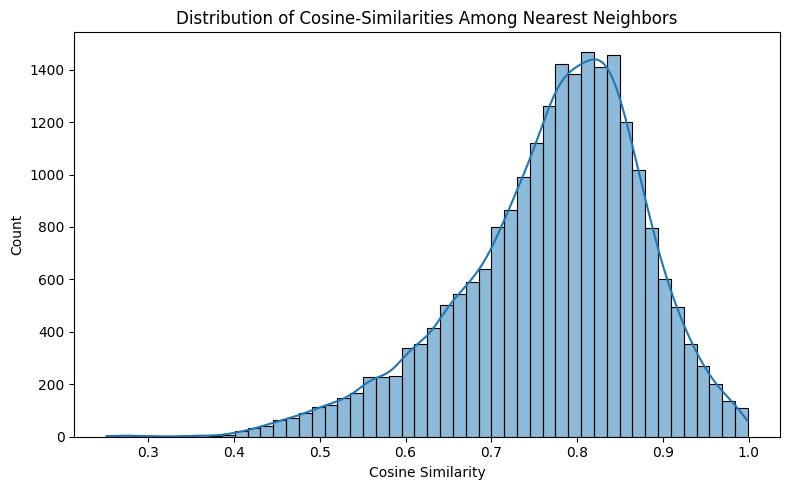

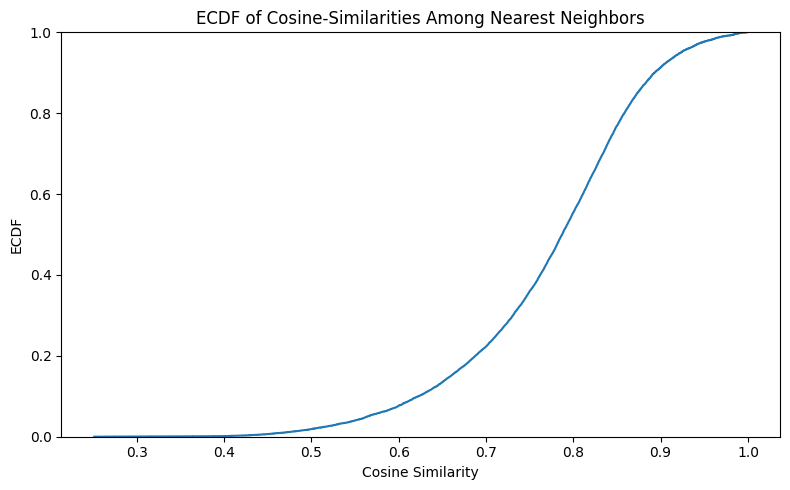

In [74]:
# How do similarities look like?
sims = nbrs_df['similarity']

plt.figure(figsize=(8, 5))
sns.histplot(sims, bins=50, kde=True)
plt.title('Distribution of Cosine-Similarities Among Nearest Neighbors')
plt.xlabel('Cosine Similarity')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.ecdfplot(sims)
plt.title('ECDF of Cosine-Similarities Among Nearest Neighbors')
plt.xlabel('Cosine Similarity')
plt.ylabel('ECDF')
plt.tight_layout()
plt.show()

In [75]:
highly_similar = nbrs_df.query('similarity >= .99').sort_values('similarity', ascending=False)
highly_similar

,index,content,neighbor_index,neighbor_content,similarity
21680,4337,i feel that i have roots to a particular geogr...,3349,i feel that i have roots to a particular geogr...,0.999305
16740,3349,i feel that i have roots to a particular geogr...,4337,i feel that i have roots to a particular geogr...,0.999305
15155,3032,it’s always better to trust the judgment of th...,3120,it’s always better to trust the judgment of th...,0.998974
15595,3120,it’s always better to trust the judgment of th...,3032,it’s always better to trust the judgment of th...,0.998974
2550,511,bringing more women into male-dominated profes...,593,bringing more women into male-dominated profes...,0.998041
2960,593,bringing more women into male-dominated profes...,511,bringing more women into male-dominated profes...,0.998041
19900,3981,"if asked, i would contribute time, money, or b...",3423,"if asked, i would contribute time, money, or b...",0.997566
17110,3423,"if asked, i would contribute time, money, or b...",3981,"if asked, i would contribute time, money, or b...",0.997566
20415,4084,there are limits to growth beyond which our in...,3313,there are limits to growth beyond which our in...,0.996436
16560,3313,there are limits to growth beyond which our in...,4084,there are limits to growth beyond which our in...,0.996436


In [76]:
# deduplicate
from modules.similarity import deduplicate_items

items_df = deduplicate_items(items_df, highly_similar)

near-duplicate groups: 22 | dropped rows: 24


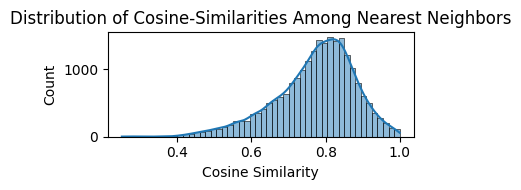

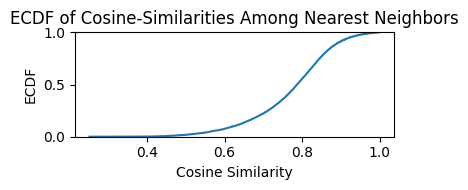

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pull out your similarity scores
sims = nbrs_df['similarity']

# 1) Histogram + KDE
plt.figure(figsize=(4, 2))
sns.histplot(sims, bins=50, kde=True)
plt.title('Distribution of Cosine-Similarities Among Nearest Neighbors')
plt.xlabel('Cosine Similarity')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 2) ECDF plot
plt.figure(figsize=(4, 2))
sns.ecdfplot(sims)
plt.title('ECDF of Cosine-Similarities Among Nearest Neighbors')
plt.xlabel('Cosine Similarity')
plt.ylabel('ECDF')
plt.tight_layout()
plt.show()

### Clustering and Representing Items in the Semantic Landscape

In [78]:
emb_col = 'qwen_embeddings'
emb_col = 'qwen_embeddings_raw'

In [79]:
items_df['Category'] = items_df['Category'].apply(lambda s: s.lower())

/Users/ezequiellopez/.pyenv/versions/polviewnet/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


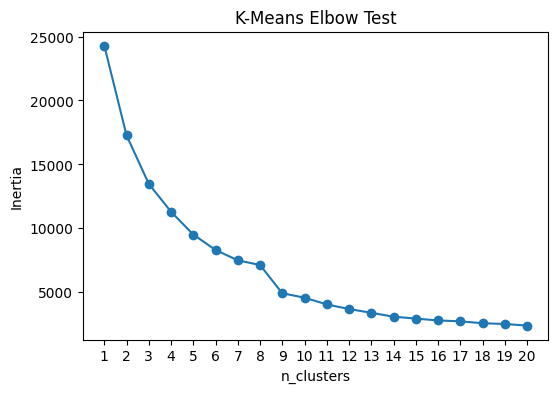

Clustering metrics:
 • Silhouette Score:        0.306
 • Calinski–Harabasz Score: 1072.6
 • Davies–Bouldin Score:    0.982


/Users/ezequiellopez/.pyenv/versions/polviewnet/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


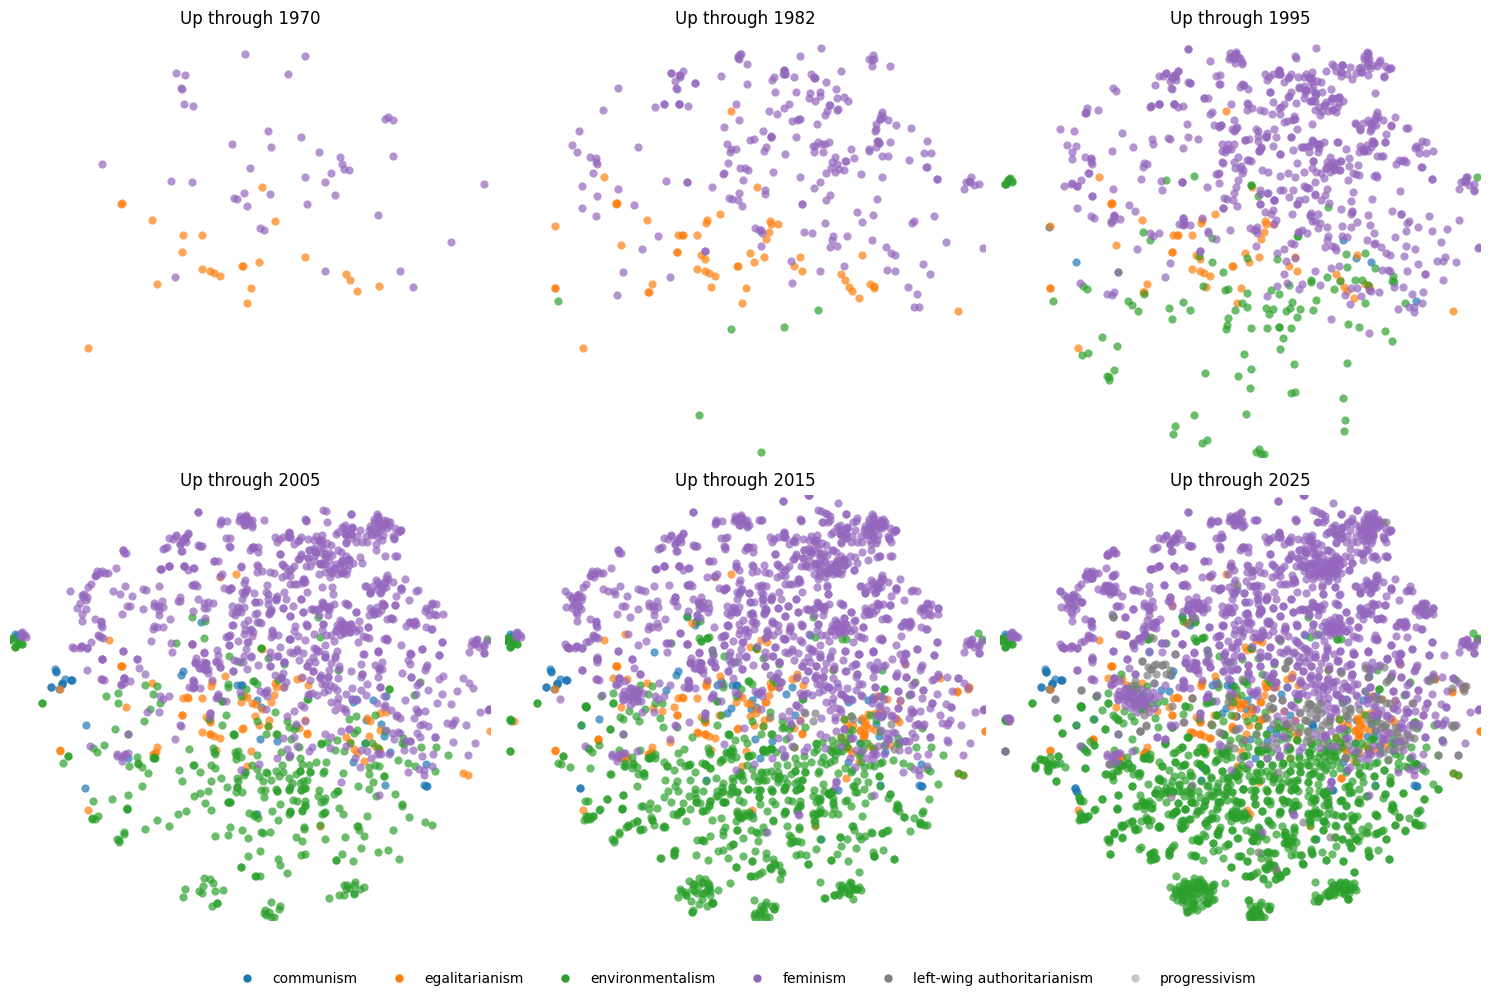

,Author,Document title,Abstract,Year,Original scale name,Category,Item content,tokens,tokens_nouns,tokens_nouns__unique_list,...,group,qwen_embeddings_raw_x,Item content__versions,qwen_embeddings_y,qwen_embeddings_raw_y,qwen_embeddings,qwen_embeddings_raw,cluster,dim1,dim2
0,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990,FEM scale,feminism,women have the right to compete with men in ev...,"[woman, right, compete, man, sphere, activity]","[woman, right, man, sphere, activity]","[woman, activity, man, right, sphere]",...,0.0,"[0.8717906475067139, 2.3683886528015137, 0.015...",[women have the right to compete with men in e...,"[5.537450790405273, 1.9330693483352661, -2.597...","[0.8717906475067139, 2.3683886528015137, 0.015...","[5.537450790405273, 1.9330693483352661, -2.597...","[0.8717906475067139, 2.3683886528015137, 0.015...",5,4.889387,29.436007
1,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990,FEM scale,feminism,"as head of the household, the father should ha...","[head, household, father, final, authority, ch...","[head, household, father, final, authority, ch...","[head, household, child, father, authority, fi...",...,0.0,"[2.6022112369537354, 0.002913000527769327, 1.8...","[as head of the household, the father should h...","[3.0980119705200195, 1.6093477010726929, 0.700...","[2.6022112369537354, 0.002913000527769327, 1.8...","[3.0980119705200195, 1.6093477010726929, 0.700...","[2.6022112369537354, 0.002913000527769327, 1.8...",2,18.123764,23.940226
2,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990,FEM scale,feminism,the unmarried mother is morally a greater fail...,"[unmarried, mother, morally, great, failure, u...","[unmarried, mother, great, failure, unmarried,...","[great, mother, father, failure, unmarried]",...,0.0,"[2.813599109649658, 1.590532898902893, 0.45868...",[the unmarried mother is morally a greater fai...,"[1.838101863861084, 4.485133647918701, -1.8118...","[2.813599109649658, 1.590532898902893, 0.45868...","[1.838101863861084, 4.485133647918701, -1.8118...","[2.813599109649658, 1.590532898902893, 0.45868...",2,30.569820,33.238209
3,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990,FEM scale,feminism,a woman who refuses to give up her job to move...,"[woman, refuse, give, job, move, husband, woul...","[woman, job, husband, marriage]","[woman, job, marriage, husband]",...,0.0,"[0.4250686466693878, 0.8295471668243408, -0.04...",[a woman who refuses to give up her job to mov...,"[3.1510119438171387, 2.8126323223114014, 2.854...","[0.4250686466693878, 0.8295471668243408, -0.04...","[3.1510119438171387, 2.8126323223114014, 2.854...","[0.4250686466693878, 0.8295471668243408, -0.04...",2,-4.906168,51.432362
4,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990,FEM scale,feminism,a woman who refuses to bear children has faile...,"[woman, refuse, bear, child, fail, duty, husband]","[woman, child, duty, husband]","[woman, child, husband, duty]",...,0.0,"[1.5195868015289307, 0.43857425451278687, 3.62...",[a woman who refuses to bear children has fail...,"[4.0924506187438965, 0.9961591958999634, 1.262...","[1.5195868015289307, 0.43857425451278687, 3.62...","[4.0924506187438965, 0.9961591958999634, 1.262...","[1.5195868015289307, 0.43857425451278687, 3.62...",2,26.981716,39.707024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3111,"Van Hiel, Alain;Kossowska, Malgorzata",Contemporary attitudes and their ideological r...,The present research tests the validity of a t...,2007

In [80]:
from modules.clustering import plot_cumulative_embedding_pipeline

excluded_categories = ['political orientation', 'ideology']

plot_cumulative_embedding_pipeline(
    df=items_df.query('Category not in @excluded_categories'),
    embedding_col='qwen_embeddings_raw',
    category_col='Category',
    years_to_plot=[1970,1982,1995,2005,2015,2025],
    prep_reducer='umap',
    pca_components=100,
    cluster_method='kmeans',
    prep_kwargs={'n_neighbors':15,'min_dist':0.1},
    elbow_range=(1, 20),
    plot_elbow=True,
    cluster_kwargs={'n_clusters': 8},
    viz_reducer='tsne',
    viz_kwargs={'perplexity': 30, 'n_iter': 1000},   # n_iter is remapped if unsupported
    random_state=55,
    cols=3,
    palette_name='tab20c',
    figsize_per_plot=(5, 5),
    wider_legend=True,
    point_size=35,
    point_alpha=0.7,
    point_edgecolor='black',            # <- border color
    point_edgewidth=0.,                # <- border thickness
    outline_mode='edge',                # or 'halo' for a crisper ring
)


/Users/ezequiellopez/.pyenv/versions/polviewnet/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Silhouette: 0.29357216
Calinski–Harabasz: 1222.8615
Davies–Bouldin: 0.9061038314824172


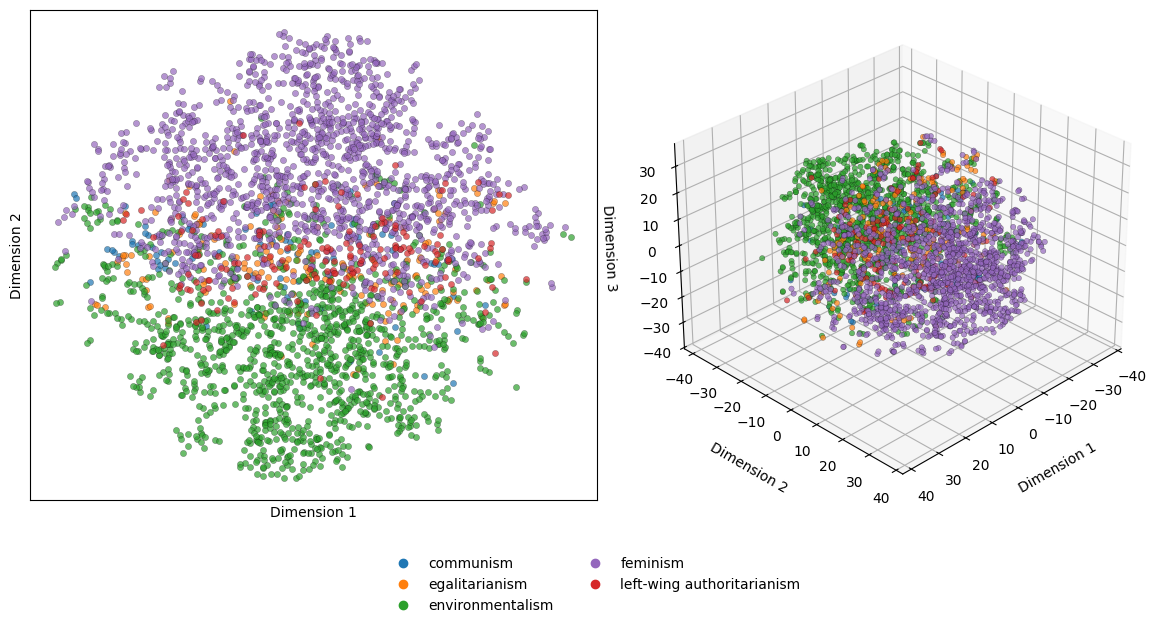

In [81]:
from modules.clustering import plot_embedding_2d_3d


my_palette = {
    'communism': '#1f77b4',
    'egalitarianism': '#ff7f0e',
    'environmentalism': '#2ca02c',
    'feminism': '#9467bd',
    'left-wing authoritarianism': '#d62728',
    'progressivism': '#bcbd22',
    'political orientation': '#17becf',
    'ideology': '#8c564b',
}

clust_df = plot_embedding_2d_3d(
    df=items_df.query('Category not in @excluded_categories'),
    embedding_col='qwen_embeddings_raw',
    prep_reducer='umap',
    category_col='Category',
    palette_name='tab20c',          # fallback
    category_palette=my_palette,    # custom map
    cluster_method='kmeans',
    viz_reducer='tsne',
    random_state=55,
    elev=30, azim=45,
    outlier_pct=99.0
)

### Evolution of central items (medoids) per category over time 

/Users/ezequiellopez/.pyenv/versions/polviewnet/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


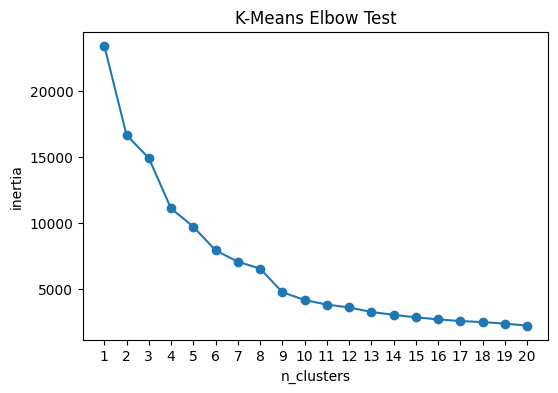

/Users/ezequiellopez/.pyenv/versions/polviewnet/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


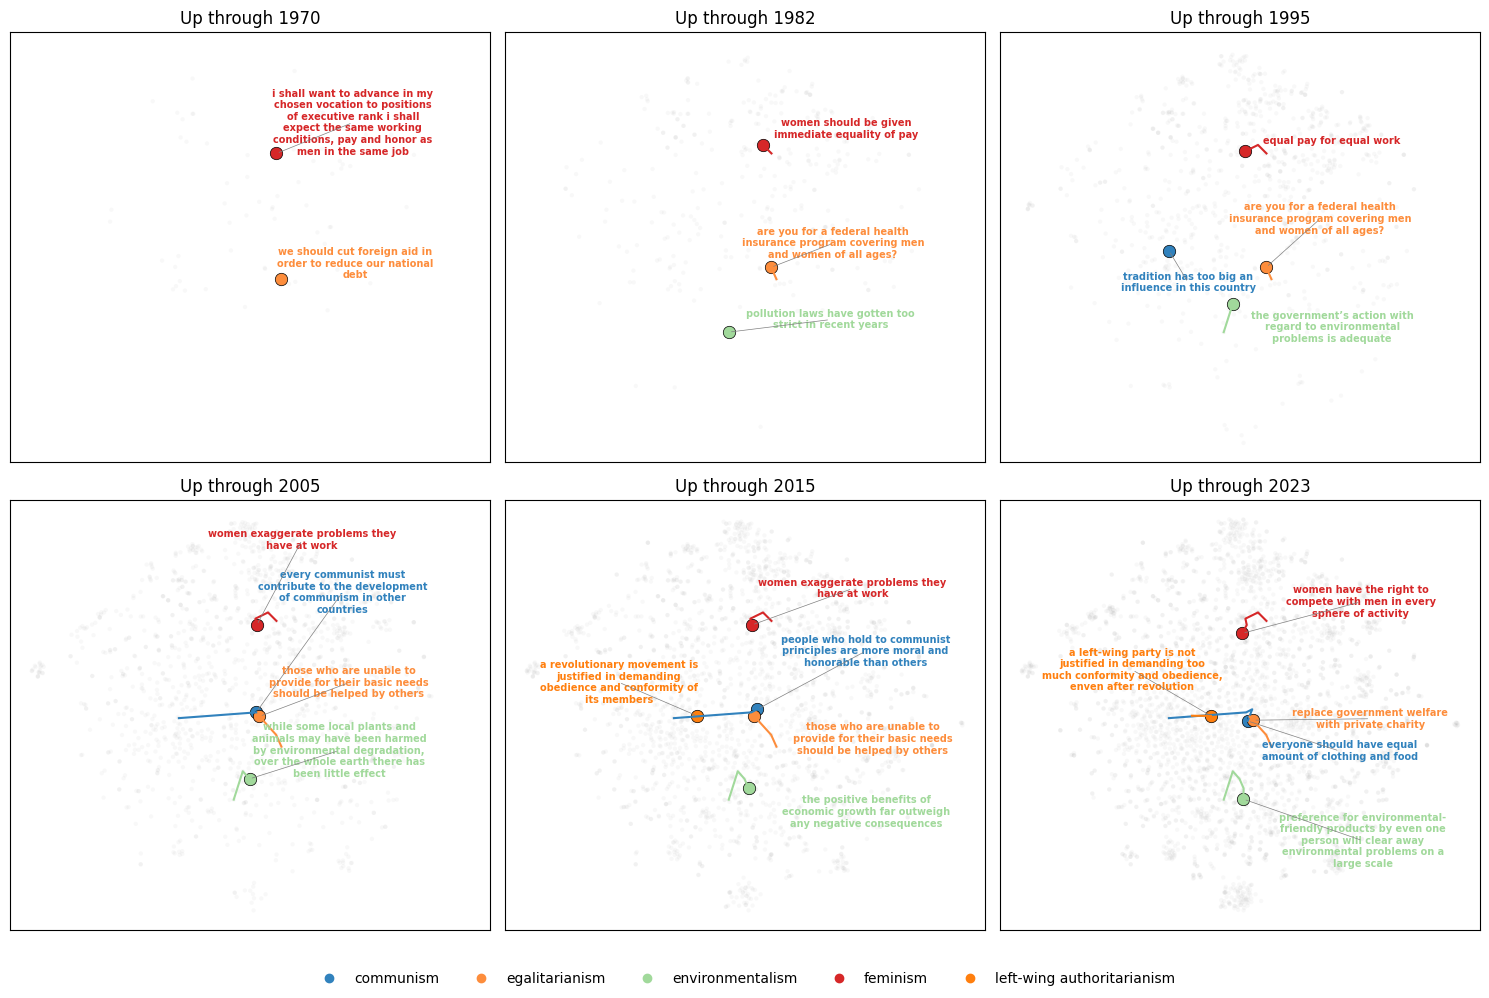

,Author,Document title,Abstract,Year,Original scale name,Category,Item content,tokens,tokens_nouns,tokens_nouns__unique_list,...,group,qwen_embeddings_raw_x,Item content__versions,qwen_embeddings_y,qwen_embeddings_raw_y,qwen_embeddings,qwen_embeddings_raw,cluster,dim1,dim2
0,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990.0,FEM scale,feminism,women have the right to compete with men in ev...,"[woman, right, compete, man, sphere, activity]","[woman, right, man, sphere, activity]","[woman, activity, man, right, sphere]",...,0.0,"[0.8717906475067139, 2.3683886528015137, 0.015...",[women have the right to compete with men in e...,"[5.537450790405273, 1.9330693483352661, -2.597...","[0.8717906475067139, 2.3683886528015137, 0.015...","[5.537450790405273, 1.9330693483352661, -2.597...","[0.8717906475067139, 2.3683886528015137, 0.015...",7,0.498069,28.581730
1,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990.0,FEM scale,feminism,"as head of the household, the father should ha...","[head, household, father, final, authority, ch...","[head, household, father, final, authority, ch...","[head, household, child, father, authority, fi...",...,0.0,"[2.6022112369537354, 0.002913000527769327, 1.8...","[as head of the household, the father should h...","[3.0980119705200195, 1.6093477010726929, 0.700...","[2.6022112369537354, 0.002913000527769327, 1.8...","[3.0980119705200195, 1.6093477010726929, 0.700...","[2.6022112369537354, 0.002913000527769327, 1.8...",6,27.290592,27.605783
2,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990.0,FEM scale,feminism,the unmarried mother is morally a greater fail...,"[unmarried, mother, morally, great, failure, u...","[unmarried, mother, great, failure, unmarried,...","[great, mother, father, failure, unmarried]",...,0.0,"[2.813599109649658, 1.590532898902893, 0.45868...",[the unmarried mother is morally a greater fai...,"[1.838101863861084, 4.485133647918701, -1.8118...","[2.813599109649658, 1.590532898902893, 0.45868...","[1.838101863861084, 4.485133647918701, -1.8118...","[2.813599109649658, 1.590532898902893, 0.45868...",6,25.224333,38.447056
3,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990.0,FEM scale,feminism,a woman who refuses to give up her job to move...,"[woman, refuse, give, job, move, husband, woul...","[woman, job, husband, marriage]","[woman, job, marriage, husband]",...,0.0,"[0.4250686466693878, 0.8295471668243408, -0.04...",[a woman who refuses to give up her job to mov...,"[3.1510119438171387, 2.8126323223114014, 2.854...","[0.4250686466693878, 0.8295471668243408, -0.04...","[3.1510119438171387, 2.8126323223114014, 2.854...","[0.4250686466693878, 0.8295471668243408, -0.04...",6,21.291439,42.562840
4,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990.0,FEM scale,feminism,a woman who refuses to bear children has faile...,"[woman, refuse, bear, child, fail, duty, husband]","[woman, child, duty, husband]","[woman, child, husband, duty]",...,0.0,"[1.5195868015289307, 0.43857425451278687, 3.62...",[a woman who refuses to bear children has fail...,"[4.0924506187438965, 0.9961591958999634, 1.262...","[1.5195868015289307, 0.43857425451278687, 3.62...","[4.0924506187438965, 0.9961591958999634, 1.262...","[1.5195868015289307, 0.43857425451278687, 3.62...",6,24.250671,49.565578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3104,"Van Hiel, Alain;Kossowska, Malgorzata",Contemporary attitudes and their ideological r...,The present research tests the validity of a

In [82]:
from modules.evolution import plot_category_evolution


excluded = ['political orientation','ideology']

plot_category_evolution(
    df=items_df.query('Category not in @excluded'),
    year_column='Year',
    embedding_column='qwen_embeddings_raw',
    text_column='Item content',
    category_column='Category',
    cutoff_years=[1970,1982,1995,2005,2015,2023],
    mode='cumulative',
    window=5,
    prep_reducer='umap',
    prep_kwargs={'n_neighbors':15,'min_dist':0.1},
    pca_components=100,
    cluster_method='kmeans',
    plot_elbow=True,
    elbow_range=(1,20),
    cluster_kwargs={'n_clusters':8},
    viz_reducer='tsne',
    viz_kwargs={'perplexity':30,'n_iter':1000},
    random_state=55,
    palette_name='tab20c',
    cols=3,
    figsize_per_plot=(5,5),
    point_alpha=0.05,
    centroid_size=80,
    show_labels=True,
    file_title="cumulative"
)

### Network representation of similarity: average semantic similarity between categories

In [83]:
from modules.network import build_df_pairs


years = [1950,1960,1970,1980,1990,2000,2010,2020,2023]
df_pairs = build_df_pairs(
    items_df,
    year_column='Year',
    category_column='Category',
    embedding_column='qwen_embeddings_raw',
    years=[2025]
)

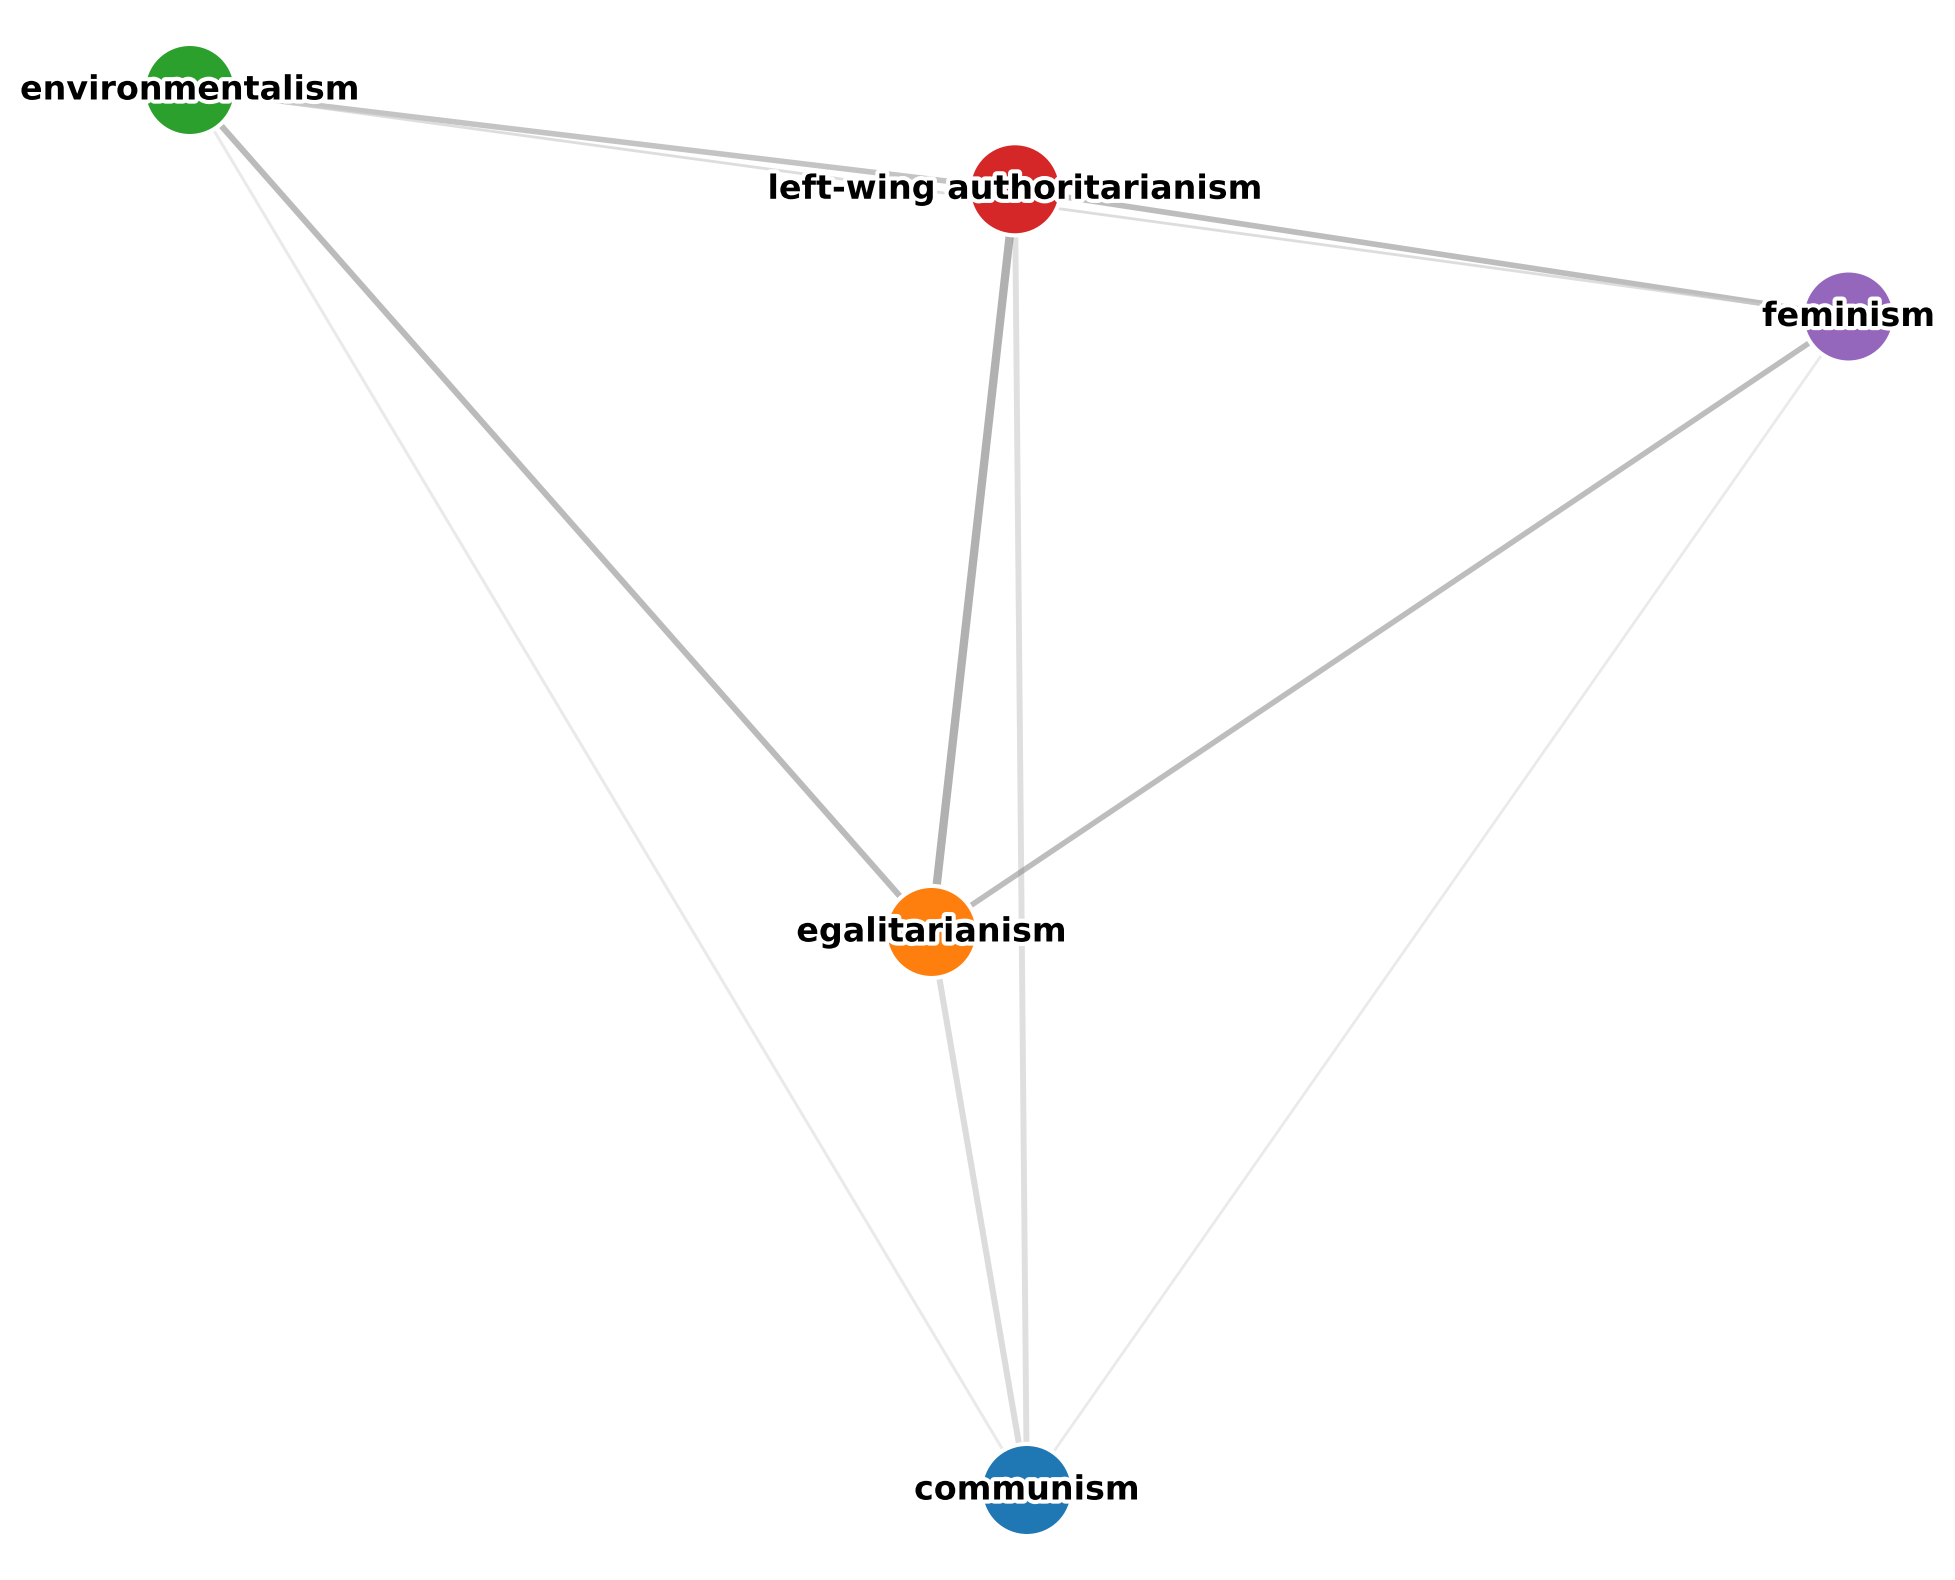

In [84]:

from modules.network import plot_category_network_3d


my_palette = {
    'communism':                 '#1f77b4',  # blue  
    'egalitarianism':            '#ff7f0e',  # orange
    'environmentalism':          '#2ca02c',  # green
    'feminism':                  '#9467bd',  # purple
    'left-wing authoritarianism':'#d62728',  # red
    'progressivism':             '#bcbd22',  # mustard yellow

}
extra_colors = {
    'political orientation': '#17becf',  # teal-cyan
    'ideology':               '#8c564b',  # warm brown
}

my_palette.update(extra_colors)



plot_category_network_3d(
    df_pairs.query('Cat1 not in @excluded_categories').query('Cat2 not in @excluded_categories'),
    year=None,
    top_n_edges=999,
    gamma=1.,
    Z0=3.,
    category_palette=my_palette,
    cmap_name='OrRd',
    edge_width=1.0,
    show_labels=True,
    grayscale_edges=True
)




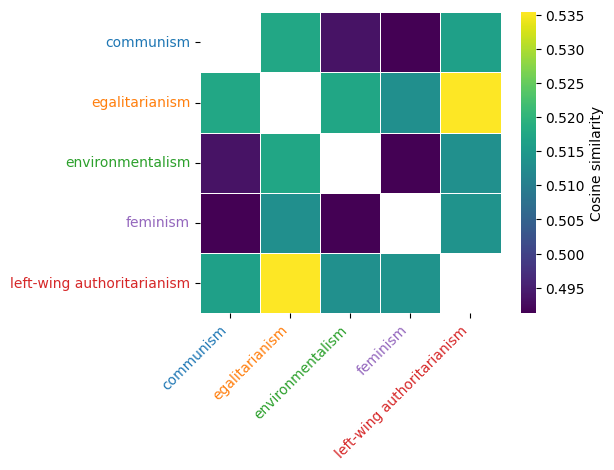

In [85]:
# If you want the latest year in df_pairs:
from modules.network import plot_category_similarity_heatmap_from_pairs


latest_year = int(df_pairs["Year"].max())

order = ["communism","egalitarianism","environmentalism","feminism",
         "left-wing authoritarianism","progressivism"]

plot_category_similarity_heatmap_from_pairs(
    df_pairs=df_pairs.query('Cat1 not in @excluded_categories and Cat2 not in @excluded_categories'),
    year=latest_year,
    cat1_col="Cat1",
    cat2_col="Cat2",
    sim_col="Overlap",
    order=order,
    palette=my_palette,
    cmap="viridis",
    figsize=(6.2, 4.8),
    save_path="figures/category_similarity_heatmap.png",
)


### Finding categories within major groups

In [86]:
from modules.clustering import plot_cumulative_embedding_pipeline

/Users/ezequiellopez/.pyenv/versions/polviewnet/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


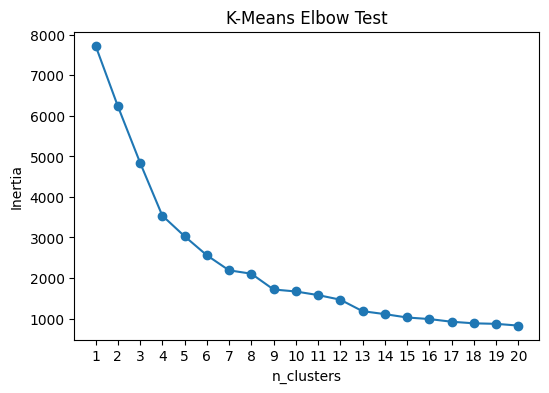

Clustering metrics:
 • Silhouette Score:        0.342
 • Calinski–Harabasz Score: 565.1
 • Davies–Bouldin Score:    0.914


/Users/ezequiellopez/.pyenv/versions/polviewnet/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


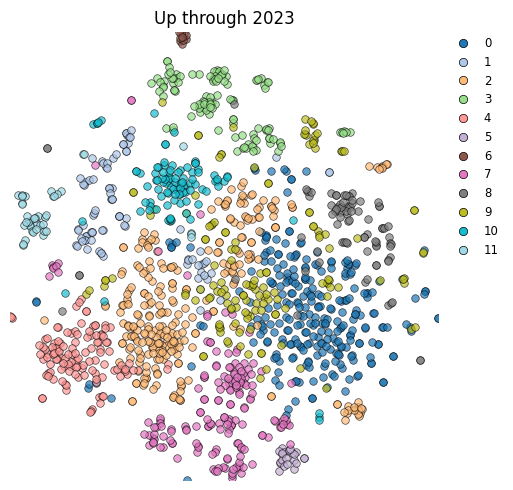

In [87]:
clustered_fem = plot_cumulative_embedding_pipeline(
    df=items_df.query('Category == "feminism"'),
    embedding_col='qwen_embeddings_raw',
    category_col=None,
    years_to_plot=[2023],
    prep_reducer='umap',
    pca_components=100,
    prep_kwargs={'n_neighbors':15,'min_dist':0.1},
    cluster_method='kmeans',
    cluster_kwargs={'n_clusters':12},
    plot_elbow=True,               # <-- run elbow from k=1 to 10
    elbow_range=(1,20),
    viz_reducer='tsne',
    viz_kwargs={'perplexity':30,'n_iter':1000},
    random_state=42,
    legend=True,
    wider_legend=False,
    point_size=30,
    point_alpha=0.7,
    point_edgecolor='black',            
    point_edgewidth=0.5,                
    outline_mode='edge',          
)

In [88]:
clustered_fem

,Author,Document title,Abstract,Year,Original scale name,Category,Item content,tokens,tokens_nouns,tokens_nouns__unique_list,...,group,qwen_embeddings_raw_x,Item content__versions,qwen_embeddings_y,qwen_embeddings_raw_y,qwen_embeddings,qwen_embeddings_raw,cluster,dim1,dim2
0,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990,FEM scale,feminism,women have the right to compete with men in ev...,"[woman, right, compete, man, sphere, activity]","[woman, right, man, sphere, activity]","[woman, activity, man, right, sphere]",...,0.0,"[0.8717906475067139, 2.3683886528015137, 0.015...",[women have the right to compete with men in e...,"[5.537450790405273, 1.9330693483352661, -2.597...","[0.8717906475067139, 2.3683886528015137, 0.015...","[5.537450790405273, 1.9330693483352661, -2.597...","[0.8717906475067139, 2.3683886528015137, 0.015...",2,7.940763,9.130113
1,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990,FEM scale,feminism,"as head of the household, the father should ha...","[head, household, father, final, authority, ch...","[head, household, father, final, authority, ch...","[head, household, child, father, authority, fi...",...,0.0,"[2.6022112369537354, 0.002913000527769327, 1.8...","[as head of the household, the father should h...","[3.0980119705200195, 1.6093477010726929, 0.700...","[2.6022112369537354, 0.002913000527769327, 1.8...","[3.0980119705200195, 1.6093477010726929, 0.700...","[2.6022112369537354, 0.002913000527769327, 1.8...",7,6.524309,-22.856770
2,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990,FEM scale,feminism,the unmarried mother is morally a greater fail...,"[unmarried, mother, morally, great, failure, u...","[unmarried, mother, great, failure, unmarried,...","[great, mother, father, failure, unmarried]",...,0.0,"[2.813599109649658, 1.590532898902893, 0.45868...",[the unmarried mother is morally a greater fai...,"[1.838101863861084, 4.485133647918701, -1.8118...","[2.813599109649658, 1.590532898902893, 0.45868...","[1.838101863861084, 4.485133647918701, -1.8118...","[2.813599109649658, 1.590532898902893, 0.45868...",7,-3.872937,-31.129606
3,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990,FEM scale,feminism,a woman who refuses to give up her job to move...,"[woman, refuse, give, job, move, husband, woul...","[woman, job, husband, marriage]","[woman, job, marriage, husband]",...,0.0,"[0.4250686466693878, 0.8295471668243408, -0.04...",[a woman who refuses to give up her job to mov...,"[3.1510119438171387, 2.8126323223114014, 2.854...","[0.4250686466693878, 0.8295471668243408, -0.04...","[3.1510119438171387, 2.8126323223114014, 2.854...","[0.4250686466693878, 0.8295471668243408, -0.04...",7,-36.769753,4.166602
4,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990,FEM scale,feminism,a woman who refuses to bear children has faile...,"[woman, refuse, bear, child, fail, duty, husband]","[woman, child, duty, husband]","[woman, child, husband, duty]",...,0.0,"[1.5195868015289307, 0.43857425451278687, 3.62...",[a woman who refuses to bear children has fail...,"[4.0924506187438965, 0.9961591958999634, 1.262...","[1.5195868015289307, 0.43857425451278687, 3.62...","[4.0924506187438965, 0.9961591958999634, 1.262...","[1.5195868015289307, 0.43857425451278687, 3.62...",7,-14.817595,-37.229042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,"Vernet, Jean-Pierre;Vala, Jorge;AmÃ¢ncio, Ligi...",Conscientization of social cryptomnesia reduce...,This paper develops a hypothesis concern

In [89]:

bows = {}
N = 30
for cluster in clustered_fem['cluster'].unique():
    _ = clustered_fem.query('cluster == @cluster')
    voc = Counter(_['tokens_nouns'].sum()).most_common()
    bows[cluster] = voc
    # Extract the top N words and their frequencies for the current cluster
    top_words = dict(voc[:N])
    print('------ \n Cluster: ', cluster)
    print('top words: \n', top_words)
    print('------')
    try:
        print(_.sample(100)['Item content'].values)
    except:
        print(_['Item content'].values)
    print('------')

------ 
 Cluster:  2
top words: 
 {'woman': 213, 'man': 182, 'job': 38, 'equal': 35, 'work': 27, 'opportunity': 19, 'sex': 17, 'feminist': 17, 'right': 16, 'girl': 15, 'boy': 12, 'political': 11, 'family': 11, 'career': 11, 'pay': 11, 'business': 10, 'daughter': 10, 'important': 10, 'son': 9, 'good': 9, 'discrimination': 9, 'position': 9, 'freedom': 8, 'professional': 8, 'many': 7, 'child': 7, 'much': 7, 'world': 7, 'place': 6, 'capable': 6}
------
['women are just as intelligent and rational as men'
 'there should be a sharp distinction drawn between men’s and women’s sports'
 'women and men should be paid equally for the same work'
 'women should have as much opportunity to do apprenticeships and learn a trade as men'
 'capitalism forces most women to wear feminine clothes to keep a job'
 'i believe that the liberation of women will also benefit men'
 'women’s experience with caring for babies, cleaning, feeding people, etc. gives them a clearer vision of reality than that of men'
 '

/Users/ezequiellopez/.pyenv/versions/polviewnet/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


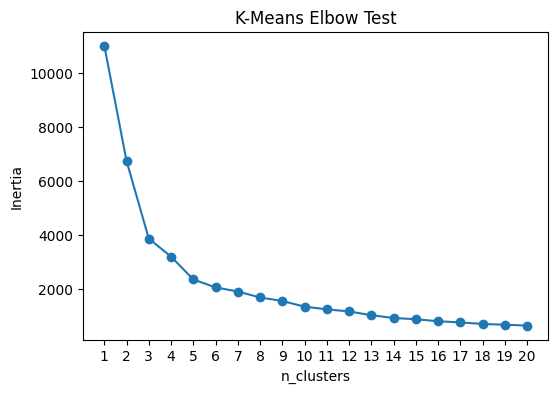

Clustering metrics:
 • Silhouette Score:        0.333
 • Calinski–Harabasz Score: 967.7
 • Davies–Bouldin Score:    0.986


/Users/ezequiellopez/.pyenv/versions/polviewnet/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


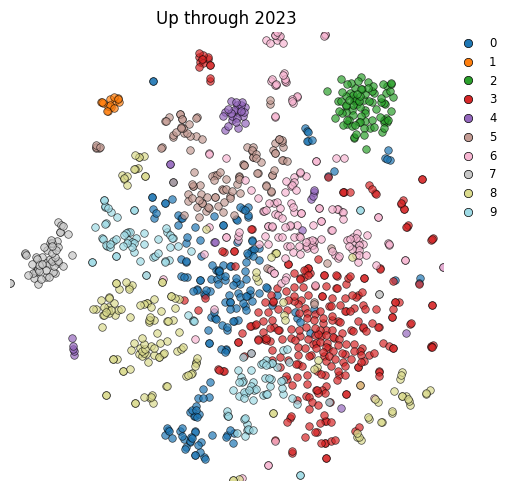

In [90]:
clustered_env = plot_cumulative_embedding_pipeline(
    df=items_df.query('Category == "environmentalism"'),
    embedding_col='qwen_embeddings_raw',
    category_col=None,
    years_to_plot=[2023],
    prep_reducer='umap',
    pca_components=100,
    prep_kwargs={'n_neighbors':15,'min_dist':0.1},
    cluster_method='kmeans',
    cluster_kwargs={'n_clusters':10},
    plot_elbow=True,               # <-- run elbow from k=1 to 10
    elbow_range=(1,20),
    viz_reducer='tsne',
    viz_kwargs={'perplexity':30,'n_iter':1000},
    random_state=42,
    legend=True,
    wider_legend=False,
    point_size=30,
    point_alpha=0.7,
    point_edgecolor='black',            
    point_edgewidth=0.5,                
    outline_mode='edge',              
)

In [91]:

bows = {}
N = 30
for cluster in clustered_env['cluster'].unique():
    _ = clustered_env.query('cluster == @cluster')
    voc = Counter(_['tokens_nouns'].sum()).most_common()
    bows[cluster] = voc
    # Extract the top N words and their frequencies for the current cluster
    top_words = dict(voc[:N])
    print('------ \n Cluster: ', cluster)
    print('top words: \n', top_words)
    print('------')
    try:
        print(_.sample(100)['Item content'].values)
    except:
        print(_['Item content'].values)
    print('------')

------ 
 Cluster:  3
top words: 
 {'nature': 28, 'economic': 26, 'people': 24, 'environmental': 24, 'growth': 23, 'environment': 21, 'natural': 18, 'human': 17, 'problem': 15, 'pollution': 14, 'society': 14, 'world': 14, 'development': 13, 'thing': 11, 'energy': 11, 'government': 11, 'change': 11, 'good': 10, 'forest': 10, 'important': 9, 'area': 9, 'country': 9, 'idea': 9, 'climate': 9, 'bad': 8, 'way': 8, 'protection': 8, 'right': 8, 'system': 8, 'use': 8}
------
['using birth control techniques'
 'the remaining forests in the world should be conserved at all costs'
 'the environmental issue has more influence than it should do'
 'many people could be devoted to art and to science only because of the economic development'
 'protection and conservation of green zones is detrimental to economic progress and growth'
 'endangered species act' 'birds'
 'being the masters of the world, human beings are entitled to deploy any of the natural resources as they like'
 'We should affirm the rig

### Build taxonomy

At this point, we want to run a prompt-engineered approach to classify elements into defined categories. This is being achieved through the script 'classify.py' and using the specific prompt for 'feminism' or 'environmentalism', respectively

In [93]:

from modules.building_taxonomy import load_joblib_responses, merge_responses_with_dataframe


environmental_main_categories = [
    "Nature & Human Relationship",
    "Technology & Development",
    "Policy & Governance",
    "Personal Identity & Responsibility",
    "Environmental Threat Perception",
    "Consumption & Materialism",
    "Intergenerational & Future Orientation"
]

feminism_main_categories = [
    "Workplace & Economic Equality",
    "Gender Roles & Domesticity",
    "Feminist Identity & Movement Engagement",
    "Political & Civic Representation",
    "Structural & Systemic Critique",
    "Reproductive Rights & Sexual Autonomy",
    "Gender Stereotypes & Cultural Norms",
    "Anti-Feminist / Backlash Attitudes"
]

df_fem = pd.read_csv("data/feminism__clustered_v1.csv")
df_env = pd.read_csv("data/environmentalism__clustered_v1.csv")

# Set the folders containing joblib files
folder_fem = "data/llama_classified/20250713_feminism_llama_v1"
folder_env = "data/llama_classified/20250713_environmentalism_llama_v1"

# Load joblib responses for feminism and environmentalism
response_map_fem = load_joblib_responses(folder_fem)
response_map_env = load_joblib_responses(folder_env)

# Merge responses with original DataFrames
df_combined_fem = merge_responses_with_dataframe(
    df_fem, response_map_fem, column_name="AI_Response"
)[['Author', 'Document title', 'Year', 'Original scale name', 'Category', 'Item content', 'AI_Response']]

df_combined_env = merge_responses_with_dataframe(
    df_env, response_map_env, column_name="AI_Response"
)[['Author', 'Document title', 'Year', 'Original scale name', 'Category', 'Item content', 'AI_Response']]


In [96]:

# Save to new Excel files for review
output_path_fem = "data/classification_feminism_v1.xlsx"
output_path_env = "data/classification_environmentalism_v1.xlsx"

df_combined_fem.to_excel(output_path_fem, index=False)
print(f"Saved merged feminism dataset to: {output_path_fem}")

df_combined_env.to_excel(output_path_env, index=False)
print(f"Saved merged environmentalism dataset to: {output_path_env}")

Saved merged feminism dataset to: data/classification_feminism_v1.xlsx
Saved merged environmentalism dataset to: data/classification_environmentalism_v1.xlsx


In [95]:
df_combined_env['Main Category'] = df_combined_env['AI_Response'].apply(lambda s: [l for l in environmental_main_categories if l in s] )
df_combined_env["n_classes"] = df_combined_env['Main Category'].apply(len)
df_combined_env["n_classes"].value_counts()

n_classes
1    1225
0      26
2       6
Name: count, dtype: int64

In [96]:
df_combined_fem['Main Category'] = df_combined_fem['AI_Response'].apply(lambda s: [l for l in feminism_main_categories if l in s] )
df_combined_fem["n_classes"] = df_combined_fem['Main Category'].apply(len)
df_combined_fem["n_classes"].value_counts()

n_classes
1    1441
0      33
2       6
4       1
Name: count, dtype: int64

In [101]:
# Build a dict of representative item -> main category
item_to_main_category = dict(
    zip(df_combined_env['Item content'], df_combined_env['Main Category'])
)

# Flatten: every (string) variant gets the same main category as its representative
maincat_map = {}
for rep_item, main_cat in item_to_main_category.items():
    variants = map_content.get(rep_item, [])
    for v in [rep_item, *variants]:
        if isinstance(v, str):                  # skip lists/tuples etc.
            maincat_map.setdefault(v, main_cat) # keep first assignment if duplicates collide

# Assign to the environmental slice
extended_items_df__env = items_df__.query('Category == "environmentalism"')
extended_items_df__env['Main Category'] = (
    extended_items_df__env['Item content'].map(maincat_map)
)


/var/folders/5c/0z4syy0s0ks9ssb607wqz7vh0000gn/T/ipykernel_98716/2897255512.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extended_items_df__env['Main Category'] = (


In [102]:
# Build a dict of representative item -> main category
item_to_main_category = dict(
    zip(df_combined_fem['Item content'], df_combined_fem['Main Category'])
)

# Flatten: every (string) variant gets the same main category as its representative
maincat_map = {}
for rep_item, main_cat in item_to_main_category.items():
    variants = map_content.get(rep_item, [])
    for v in [rep_item, *variants]:
        if isinstance(v, str):                  # skip lists/tuples etc.
            maincat_map.setdefault(v, main_cat) # keep first assignment if duplicates collide

# Assign to the environmental slice
extended_items_df__fem = items_df__.query('Category == "feminism"')
extended_items_df__fem['Main Category'] = (
    extended_items_df__fem['Item content'].map(maincat_map)
)


/var/folders/5c/0z4syy0s0ks9ssb607wqz7vh0000gn/T/ipykernel_98716/3878520150.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extended_items_df__fem['Main Category'] = (


In [103]:
extended_items_df__fem

,Author,Document title,Abstract,Year,Original scale name,Category,Item content,tokens,tokens_nouns,tokens_nouns__unique,Main Category
0,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990,FEM scale,feminism,women have the right to compete with men in ev...,"[woman, right, compete, man, sphere, activity]","[woman, right, man, sphere, activity]",right woman sphere man activity,[Workplace & Economic Equality]
0,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990,FEM scale,feminism,"as head of the household, the father should ha...","[head, household, father, final, authority, ch...","[head, household, father, final, authority, ch...",child authority head father household final,[Gender Roles & Domesticity]
0,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990,FEM scale,feminism,the unmarried mother is morally a greater fail...,"[unmarried, mother, morally, great, failure, u...","[unmarried, mother, great, failure, unmarried,...",mother father unmarried great failure,[Gender Stereotypes & Cultural Norms]
0,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990,FEM scale,feminism,a woman who refuses to give up her job to move...,"[woman, refuse, give, job, move, husband, woul...","[woman, job, husband, marriage]",husband woman job marriage,[Gender Roles & Domesticity]
0,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990,FEM scale,feminism,a woman who refuses to bear children has faile...,"[woman, refuse, bear, child, fail, duty, husband]","[woman, child, duty, husband]",child woman duty husband,[Gender Roles & Domesticity]
...,...,...,...,...,...,...,...,...,...,...,...
1194,"Twenge, J.M.",Mapping gender: The Multifactorial Approach an...,NaN,1999,attitudes toward woman scale (AWS),feminism,economic and social freedom is worth far more ...,"[economic, social, freedom, worth, far, woman,...","[economic, social, freedom, worth, woman, acce...",acceptance worth economic femininity social wo...,[Structural & Systemic Critique]
1194,"Twenge, J.M.",Mapping gender: The Multifactorial Approach an...,NaN,1999,attitudes toward woman scale (AWS),feminism,"on the average, women should be regarded as le...","[average, woman, regard, less, capable, contri...","[average, woman, capable, economic, production...",average production capable economic woman man,[Workplace & Economic Equality]
1194,"Twenge, J.M.",Mapping gender: The Multifactorial Approach an...,NaN,1999,attitudes toward woman scale (AWS),feminism,there are many jobs in which men should be giv...,"[many, job, man, give, preference, woman, hire...","[many, job, man, preference, woman]",preference woman many man job,[Workplace & Economic Equality]
1194,"Twenge, J.M.",Mapping gender: The Multifactorial Approach an...,NaN,1999,attitudes toward woman scale (AWS),feminism,women should be given equal opportunity with m...,"[woman, give, equal, opportunity, man, apprent...","[woman, equal, opportunity, man, apprenticeshi...",apprenticeship equal trade woman man various o...,[Workplace & Economic Equality]


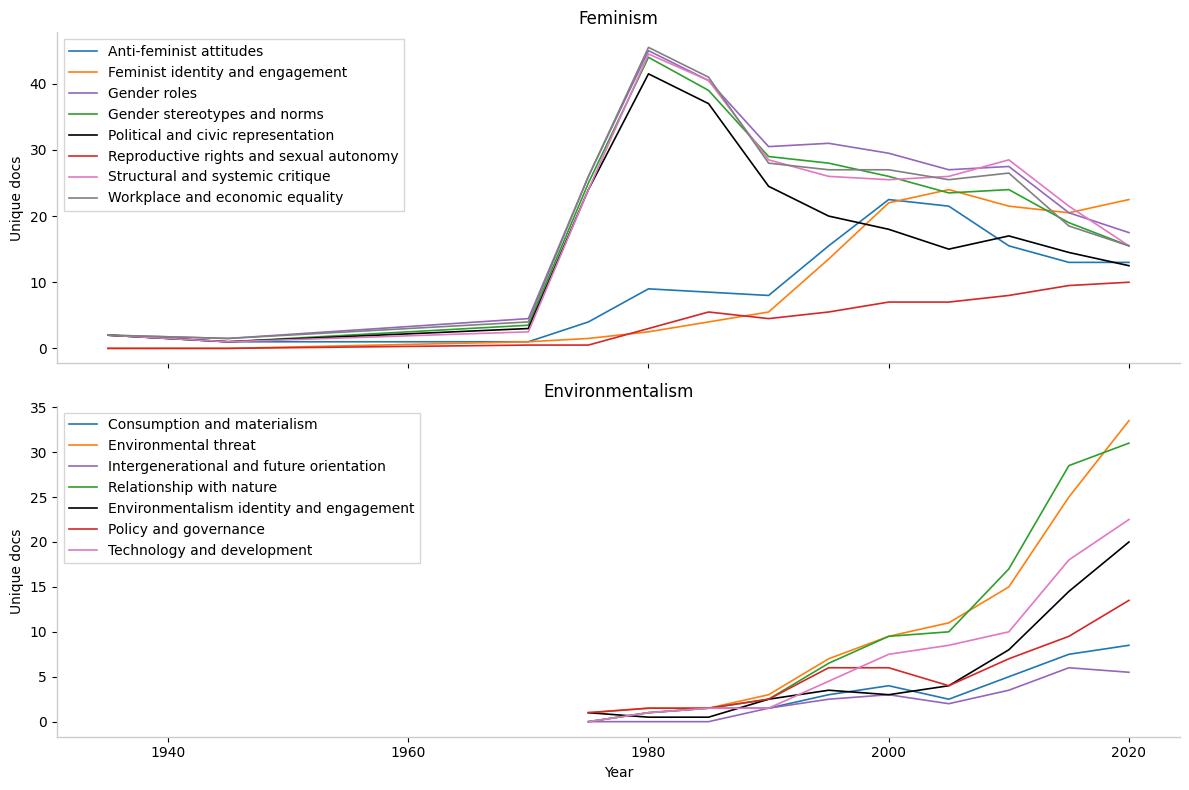

In [104]:
from modules.tracking_subclasses import plot_two_prevalence_panels


config_fem = {
    "year_col": "Year",
    "cat_col": "Main Category",
    "doc_id_col": "Document title",
    "rename_dict": {
        'Anti-Feminist / Backlash Attitudes': 'Anti-feminist attitudes',
        'Feminist Identity & Movement Engagement': 'Feminist identity and engagement',
        'Gender Roles & Domesticity': 'Gender roles',
        'Gender Stereotypes & Cultural Norms': 'Gender stereotypes and norms',
        'Political & Civic Representation': 'Political and civic representation',
        'Reproductive Rights & Sexual Autonomy': 'Reproductive rights and sexual autonomy',
        'Structural & Systemic Critique': 'Structural and systemic critique',
        'Workplace & Economic Equality': 'Workplace and economic equality',
    },
    "category_order": [
        "Anti-feminist attitudes",
        "Feminist identity and engagement",
        "Gender roles",
        "Gender stereotypes and norms",
        "Political and civic representation",
        "Reproductive rights and sexual autonomy",
        "Structural and systemic critique",
        "Workplace and economic equality"
    ]
}
 
config_env = {
    "year_col": "Year",
    "cat_col": "Main Category",
    "doc_id_col": "Document title",
    "rename_dict": {
        "Nature & Human Relationship": "Relationship with nature",
        "Technology & Development": "Technology and development",
        "Policy & Governance": "Policy and governance",
        "Personal Identity & Responsibility": "Environmentalism identity and engagement",
        "Environmental Threat Perception": "Environmental threat",
        "Consumption & Materialism": "Consumption and materialism",
        "Intergenerational & Future Orientation": "Intergenerational and future orientation"
    },
    "category_order": [
        "Consumption and materialism",
        "Environmental threat",
        "Intergenerational and future orientation",
        "Relationship with nature",
        "Environmentalism identity and engagement",
        "Policy and governance",
        "Technology and development"
    ]
}

plot_two_prevalence_panels(
    df1=extended_items_df__fem,
    df2=extended_items_df__env,
    config1=config_fem,
    config2=config_env,
    window_size=5,
    normalize=False,
    cumulative=False,
    smooth=True,
    style="default",
    titles=("Feminism", "Environmentalism"),
    figsize=(12, 8),
    save_path="themes_per_category__raw.png"
)


This function builds two time series panels. In each, it bins years into fixed-size windows, counts how many unique documents in each window had at least one item from each category, optionally normalizes by total unique documents in that window to get a share, optionally makes the counts cumulative (if not normalizing), and optionally smooths with a rolling mean. Then it plots the category curves for dataset 1 (top) and dataset 2 (bottom), with consistent styling and optional category renaming/ordering.

----